In [20]:
import pymongo as mg
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dburl = 'mongodb://localhost:27017'
mymg = mg.MongoClient(dburl)

dbs = mymg.list_database_names()
dbs

['Kampus',
 'admin',
 'config',
 'jule',
 'local',
 'pymongodb',
 'resto',
 'tokoonline']

In [22]:
mydb = mymg['resto']
mycol = mydb['resto']
alldata = list(mycol.find())
# alldata

In [23]:
dfResto = pd.DataFrame(alldata)
dfResto

,_id,address,borough,cuisine,grades,name,restaurant_id
0,5ddb65058f15f6246b34e874,"{'building': '7715', 'coord': [-73.9973325, 40...",Brooklyn,American,"[{'date': 2014-04-16 00:00:00, 'grade': 'A', '...",C & C Catering Service,40357437
1,5ddb65058f15f6246b34e875,"{'building': '1269', 'coord': [-73.871194, 40....",Brooklyn,Chinese,"[{'date': 2014-09-16 00:00:00, 'grade': 'B', '...",May May Kitchen,40358429
2,5ddb65058f15f6246b34e876,"{'building': '1', 'coord': [-73.96926909999999...",Manhattan,American,"[{'date': 2014-05-07 00:00:00, 'grade': 'A', '...",1 East 66Th Street Kitchen,40359480
3,5ddb65058f15f6246b34e877,"{'building': '705', 'coord': [-73.9653967, 40....",Brooklyn,Jewish/Kosher,"[{'date': 2014-11-10 00:00:00, 'grade': 'A', '...",Seuda Foods,40360045
4,5ddb65058f15f6246b34e878,"{'building': '203', 'coord': [-73.978220400000...",Brooklyn,"Ice Cream, Gelato, Yogurt, Ices","[{'date': 2014-02-10 00:00:00, 'grade': 'A', '...",Carvel Ice Cream,40360076
...,...,...,...,...,...,...,...
3767,5ddb65058f15f6246b34f72b,"{'building': '1249', 'coord': [-73.9584625, 40...",Brooklyn,Spanish,"[{'date': 2014-09-11 00:00:00, 'grade': 'A', '...",La Villita Restaurant,40899209
3768,5ddb65058f15f6246b34f72c,"{'building': '145', 'coord': [-73.986544, 40.7...",Manhattan,Café/Coffee/Tea,"[{'date': 2014-09-22 00:00:00, 'grade': 'A', '...",Starbucks Coffee,40899767
3769,5ddb65058f15f6246b34f72d,"{'building': '1412', 'coord': [-73.9866522, 40...",Manhattan,Sandwiches/Salads/Mixed Buffet,"[{'date': 2014-04-16 00:00:00, 'grade': 'A', '...",Europa Cafe,40900039
3770,5ddb65058f15f6246b34f72e,"{'building': '8405', 'coord': [-74.02521709999...",Brooklyn,Chinese,"[{'date': 2014-02-25 00:00:00, 'grade': 'A', '...",Chopstix Restaurant,40900694


In [24]:
dfResto['cuisine'].unique

<bound method Series.unique of 0                             American 
1                               Chinese
2                             American 
3                         Jewish/Kosher
4       Ice Cream, Gelato, Yogurt, Ices
                     ...               
3767                            Spanish
3768                    Café/Coffee/Tea
3769     Sandwiches/Salads/Mixed Buffet
3770                            Chinese
3771                    Café/Coffee/Tea
Name: cuisine, Length: 3772, dtype: object>

In [25]:
dfCuisine = dfResto['cuisine'].value_counts()
dfCuisine[1:10]

Italian                                                             325
Pizza                                                               270
Café/Coffee/Tea                                                     180
Hamburgers                                                          159
Bakery                                                              127
Chinese                                                             115
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    115
Pizza/Italian                                                       106
Japanese                                                             80
Name: cuisine, dtype: int64

In [26]:
dfTop10 = pd.DataFrame(dfCuisine[:10])
dfTop10

,cuisine
American,1255
Italian,325
Pizza,270
Café/Coffee/Tea,180
Hamburgers,159
Bakery,127
Chinese,115
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",115
Pizza/Italian,106
Japanese,80


In [27]:
dfTop10['cuisine']

American                                                            1255
Italian                                                              325
Pizza                                                                270
Café/Coffee/Tea                                                      180
Hamburgers                                                           159
Bakery                                                               127
Chinese                                                              115
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     115
Pizza/Italian                                                        106
Japanese                                                              80
Name: cuisine, dtype: int64

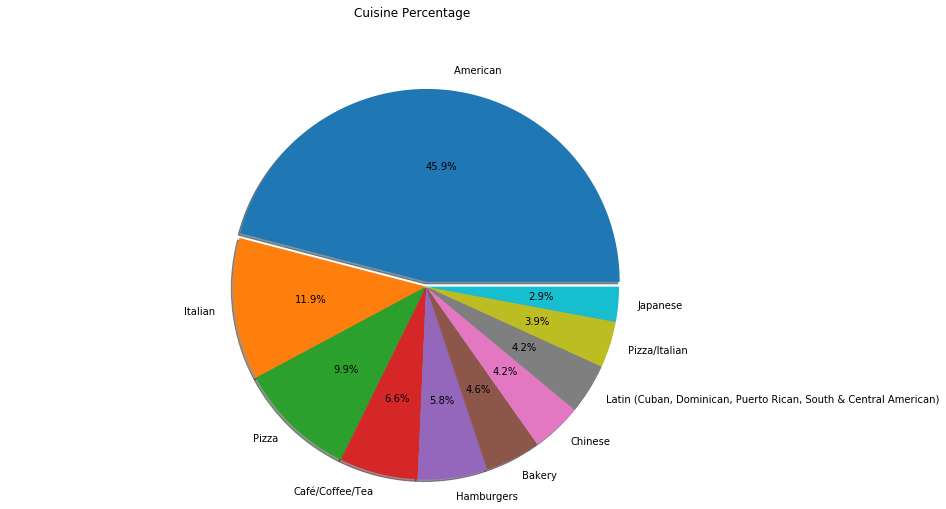

In [49]:
#PIE CHART TOP10
labels = (dfTop10.index)
percentage = dfTop10['cuisine']
explode = (0.05,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(15,8))
plt.pie(percentage, labels=labels,explode=explode, autopct='%1.1f%%',shadow=True, startangle=0, radius=2)
plt.axis('equal')
plt.suptitle('Cuisine Percentage')
plt.show()